# 8   Predicting numeric values: regression

## 8.1   Finding best-fit lines with linear regression

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

***Listing 8.1*   Standard regression function and data importing functions: `loadDataSet()` & `standRegres()`**

In [2]:
from numpy import *

In [6]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [7]:
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [8]:
xArr, yArr = loadDataSet('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch08/ex0.txt')

In [9]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [10]:
ws = standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

Since we assume `X0 = 1`, we'll get `y = ws[0] + ws[1] * X1`.

In [13]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

`yHat` is the predicted `y`.

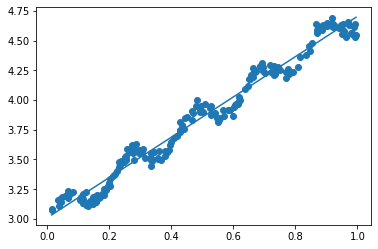

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)   # Pyplot will have a problem if the points are out of order, so we first sort the points in ascending order
yHat = xCopy * ws
ax.plot(xCopy[:,1], yHat)
plt.show()

In [16]:
yHat = xMat * ws
corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 8.2   Locally weighted linear regression

***Listing 8.2*   Locally weighted linear regression function: `lwlr()` & `lwlrTest()`**

In [17]:
def lwlr(testPoint, xArr, yArr, k = 1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye(m))   # Create diagonal matrix
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T / (-2.0*k**2))   # Populate weights with exponentially decaying values
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [18]:
def lwlrTest(testArr, xArr, yArr, k = 1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [19]:
xArr, yArr = loadDataSet('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch08/ex0.txt')
yArr[0]

3.176513

In [20]:
lwlr(xArr[0], xArr, yArr, 1.0)
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.12204471]])

matrix([[3.20175729]])

In [21]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [22]:
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

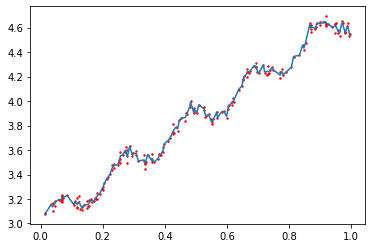

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0], s = 2, c = 'red')
plt.show()

## 8.3   Example: predicting the age of an abalone

In [25]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [26]:
abX, abY = loadDataSet('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch08/abalone.txt')
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

The function `rssError()` will give us a single number describing the error of our estimate.

In [27]:
rssError(abY[0:99], yHat01.T)
rssError(abY[0:99], yHat1.T)
rssError(abY[0:99], yHat10.T)

56.78868743048742

429.8905618704253

549.1181708829058

In [28]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)

In [29]:
rssError(abY[100:199], yHat01.T)
rssError(abY[100:199], yHat1.T)
rssError(abY[100:199], yHat10.T)

57913.51550155909

573.5261441895273

517.571190538078

Compare the errors above with simple linear regression:

In [30]:
ws = standRegres(abX[0:99], abY[0:99])
yHat = mat(abX[100:199]) * ws
rssError(abY[100:199], yHat.T.A)

518.6363153245542

## 8.4   Shrinking coefficients to understand our data

### 8.4.1   Ridge regression

***Listing 8.3*   Ridge regression: `ridgeRegres()` & `ridgeTest()`**

In [31]:
def ridgeRegres(xMat, yMat, lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [32]:
def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMeans = mean(xMat, 0)
    xVar = var(xMat, 0)
    xMat = (xMat - xMeans) / xVar   # Normalization code
    numTestPts = 30
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [33]:
abX, abY = loadDataSet('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch08/abalone.txt')
ridgeWeights = ridgeTest(abX, abY)

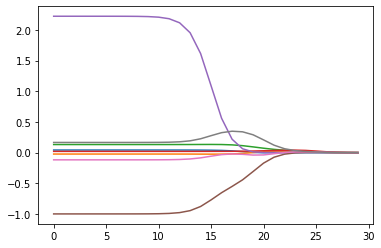

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

To find satisfactory answers, you'd need to do cross-validation testing.

### 8.4.3   Forward stagewise regression

In [40]:
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = mean(inMat, 0)
    inVar = var(inMat, 0)
    inMat = (inMat - inMeans) / inVar
    return inMat

***Listing 8.4*   Forward stagewise linear regression: `stageWise()`**

In [45]:
def stageWise(xArr, yArr, eps = 0.01, numIt = 100):   # 'eps' is the step size for each iteration
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m, n = shape(xMat)
    ws = zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    returnMat = zeros((numIt,n))   # Initialize 'returnMat'
    for i in range(numIt):
        # print(ws.T)
        lowestError = inf
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [46]:
xArr, yArr = loadDataSet('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch08/abalone.txt')
stageWise(xArr, yArr, 0.01, 200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

Now try `stageWise()` again with smaller step size and more steps.

In [47]:
stageWise(xArr, yArr, 0.001, 5000)

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

Compare with the answers to the least-squares weights:

In [48]:
xMat = mat(xArr)
yMat = mat(yArr).T
xMat = regularize(xMat)
yM = mean(yMat, 0)
yMat = yMat - yM
weights = standRegres(xMat, yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

After 5000 iterations, the results from the stagewise linear regression algorithm are close to the results using regular least squares.

## 8.6   Example: forecasting the price of LEGO sets

### 8.6.1   Collect: using the Google shopping API

***Listing 8.5*   Shopping information retrieval function: `searchForSet()` & `setDataCollect()`**

In [50]:
from time import sleep
import json
import urllib.request   # 'urllib2' is not available in Python3

In [65]:
def searchForSet(retX, retY, setNum, yr, numPce, origPrc):
    sleep(10)
    myAPIstr = 'get%20from%20code.google.com'
    searchURL = 'https://www.googleapis.com/shopping/search/v1/public/products?key=%s&country=US&q=lego+%d&alt=json' % (myAPIstr, setNum)
    pg = urllib.request.urlopen(searchURL)
    retDict = json.loads(pg.read())
    for i in range(len(retDict['items'])):
        try:
            currItem = retDict['items'][i]
            if currItem['product']['condition'] == 'new':
                newFlag = 1
            else:
                newFlag = 0
            listOfInv = currItem['product']['inventories']
            for item in listOfInv:
                sellingPrice = item['price']
                if sellingPrice > origPrc * 0.5:
                    print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                    retX.append([yr, numPce, newFlag, origPrc])
                    retY.append(sellingPrice)
        except:
            print('problem with item %d' % i)

In [66]:
def setDataCollect(retX, retY):
    searchForSet(retX, retY, 8288, 2006, 800, 49.99)
    searchForSet(retX, retY, 10030, 2002, 3096, 269.99)
    searchForSet(retX, retY, 10179, 2007, 5195, 499.99)
    searchForSet(retX, retY, 10181, 2007, 3428, 199.99)
    searchForSet(retX, retY, 10189, 2008, 5922, 299.99)
    searchForSet(retX, retY, 10196, 2009, 3263, 249.99)

The url provided is unavailable now, so I will refer to several offline websites. Functions and files are copied from [Github](https://github.com/Jack-Cherish/Machine-Learning/tree/master/Regression) and [cnblogs](https://www.cnblogs.com/hemiy/p/6249506.html).

In [84]:
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    from bs4 import BeautifulSoup
    fr = open(inFile, 'r', encoding = 'utf8')
    soup = BeautifulSoup(fr.read())
    i = 1
    currentRow = soup.findAll('table', r = "%d" % i)
    while(len(currentRow) != 0):
        title = currentRow[0].findAll('a')[1].text
        lwrTitle = title.lower()
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        soldUnicde = currentRow[0].findAll('td')[3].findAll('span')
        if len(soldUnicde) == 0:
            print("item #%d did not sell" % i)
        else:
            soldPrice = currentRow[0].findAll('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$', '')   # strips out $
            priceStr = priceStr.replace(',', '')   # strips out ,
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')   # strips out Free Shipping
            sellingPrice = float(priceStr)
            if  sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.findAll('table', r = "%d" % i)

In [89]:
def setDataCollect(retX, retY):
    scrapePage(retX, retY, '/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_Summary/legoEbay/lego8288.html', 2006, 800, 49.99)
    scrapePage(retX, retY, '/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_Summary/legoEbay/lego10030.html', 2002, 3096, 269.99)
    scrapePage(retX, retY, '/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_Summary/legoEbay/lego10179.html', 2007, 5195, 499.99)
    scrapePage(retX, retY, '/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_Summary/legoEbay/lego10181.html', 2007, 3428, 199.99)
    scrapePage(retX, retY, '/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_Summary/legoEbay/lego10189.html', 2008, 5922, 299.99)
    scrapePage(retX, retY, '/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_Summary/legoEbay/lego10196.html', 2009, 3263, 249.99)

In [90]:
lgX = []
lgY = []

In [91]:
setDataCollect(lgX, lgY)

2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
item #4 did not sell
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
item #11 did not sell
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
item #4 did not sell
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990

### 8.6.2   Train: building a model

First, add in a 1 for `X0`.

In [92]:
shape(lgX)

(63, 4)

In [93]:
lgX1 = mat(ones((63,5)))
lgX1[:,1:5] = mat(lgX)

In [94]:
lgX[0]
lgX1[0]

[2006, 800, 0.0, 49.99]

matrix([[1.000e+00, 2.006e+03, 8.000e+02, 0.000e+00, 4.999e+01]])

In [95]:
ws = standRegres(lgX1, lgY)
ws

matrix([[ 5.53199701e+04],
        [-2.75928219e+01],
        [-2.68392234e-02],
        [-1.12208481e+01],
        [ 2.57604055e+00]])

In [96]:
lgX1[0] * ws
lgX1[-1] * ws
lgX1[43] * ws

matrix([[76.07418864]])

matrix([[431.17797682]])

matrix([[516.20733116]])

The price of a set will be `$55319.97 - 27.59 * Year - 0.00268 * NumPieces - 11.22 * NewOrUsed + 2.57 * original price` according to the model.

***Listing 8.6*  Cross-validation testing with ridge regression: `crossValidation()`**

In [97]:
import random

In [104]:
def crossValidation(xArr, yArr, numVal = 10):
    m = len(yArr)
    indexList = list(range(m))
    errorMat = zeros((numVal, 30))
    for i in range(numVal):
        trainX = []
        trainY = []
        testX = []
        testY = []   # Create training and test containers
        random.shuffle(indexList)
        for j in range(m):
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])   # Split data into test and training sets
        wMat = ridgeTest(trainX, trainY)
        for k in range(30):
            matTestX = mat(testX)
            matTrainX = mat(trainX)
            meanTrain = mean(matTrainX, 0)
            varTrain = var(matTrainX, 0)   # Regularize test with training params
            matTestX = (matTestX - meanTrain) / varTrain
            yEst = matTestX * mat(wMat[k,:]).T + mean(trainY)
            errorMat[i,k] = rssError(yEst.T.A, array(testY))
    meanErrors = mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors == minMean)]
    xMat = mat(xArr)
    yMat = mat(yArr).T
    meanX = mean(xMat, 0)
    varX = var(xMat, 0)
    unReg = bestWeights / varX
    print("the best model from Ridge Regression is:\n", unReg)
    print("with constant term: ", -1*sum(multiply(meanX, unReg)) + mean(yMat))   # Undo regularization

In [105]:
crossValidation(lgX, lgY, 10)

the best model from Ridge Regression is:
 [[-3.18805372e+01 -1.93513061e-03 -3.48041084e+01  2.27669730e+00]]
with constant term:  63928.8548244537


In [107]:
ridgeTest(lgX, lgY)

array([[-1.45288906e+02, -8.39360442e+03, -3.28682450e+00,
         4.42362406e+04],
       [-1.46649725e+02, -1.89952152e+03, -2.80638599e+00,
         4.27891633e+04],
       [-1.44450432e+02,  8.55488076e+02, -1.35089285e+00,
         4.00885735e+04],
       [-1.37402474e+02,  1.64217093e+03,  1.95840783e+00,
         3.44932120e+04],
       [-1.24750588e+02,  1.44326171e+03,  7.62540167e+00,
         2.50647592e+04],
       [-1.10234679e+02,  8.81842164e+02,  1.40617304e+01,
         1.43874420e+04],
       [-9.96484167e+01,  4.17805568e+02,  1.87140361e+01,
         6.66770425e+03],
       [-9.40345090e+01,  1.71289137e+02,  2.10844952e+01,
         2.71206176e+03],
       [-9.11400659e+01,  6.57287394e+01,  2.20487105e+01,
         1.03800465e+03],
       [-8.86246985e+01,  2.45452725e+01,  2.23181664e+01,
         3.87564774e+02],
       [-8.41447674e+01,  9.05861459e+00,  2.21495534e+01,
         1.43313895e+02],
       [-7.44804291e+01,  3.31863501e+00,  2.14607512e+01,
      

If having to choose one feature to predict the future, choose the fourth feature according to the regularized coefficients above.